In [372]:
# Import necessary packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [994]:
# Loading character details from 'onepiece_character_detail.csv'
one_piece = pd.read_csv('onepiece_character_detail.csv')
one_piece.head(1)

,Name,Affiliations:,Birthday:,Debut:,Funi English VA:,Japanese Name:,Japanese VA:,Occupations:,Official English Name:,Romanized Name:,...,Features:,Devil Fruit Affiliations:,Devil Fruit Funi English VA:,Devil Fruit Japanese VA:,Homeland:,Captain:,Total Bounty:,Fighting Style Focus:,Literal Meaning:,User(s):
0,A O,A O Pirates;[2] Subordinate of the Whitebeard ...,January 15th[3],Chapter 551; Episode 460[1],Mark Fickert,A・O,Kōhei Fukuhara,Pirate; Captain[1][2],A.O. (VIZ Media and FUNimation subs);A.O (FUNi...,Ā Ō,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
# Print dataframe information
one_piece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                1376 non-null   object 
 1   Affiliations:                       1165 non-null   object 
 2   Birthday:                           712 non-null    object 
 3   Debut:                              1351 non-null   object 
 4   Funi English VA:                    940 non-null    object 
 5   Japanese Name:                      1369 non-null   object 
 6   Japanese VA:                        989 non-null    object 
 7   Occupations:                        1162 non-null   object 
 8   Official English Name:              1259 non-null   object 
 9   Romanized Name:                     1367 non-null   object 
 10  Status:                             1350 non-null   object 
 11  Age at Death:                       39 non-

## Data Preprocessing

In [995]:
# Create a new dataframe with only devil fruit related columns
devilFruit_col = ['Name'] + [col for col in one_piece.columns if 'Devil' in col]
one_piece[devilFruit_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                1376 non-null   object
 1   Devil Fruit English Name:           176 non-null    object
 2   Devil Fruit Japanese Name:          160 non-null    object
 3   Devil Fruit Meaning:                151 non-null    object
 4   Devil Fruit Type:                   183 non-null    object
 5   Devil Fruit First Appearance:       7 non-null      object
 6   Devil Fruit Official English Name:  7 non-null      object
 7   Devil Fruit Romanized Name:         7 non-null      object
 8   Devil Fruit Owners:                 1 non-null      object
 9   Devil Fruit Affiliations:           1 non-null      object
 10  Devil Fruit Funi English VA:        1 non-null      object
 11  Devil Fruit Japanese VA:            1 non-null      obje

In [996]:
one_piece[devilFruit_col][one_piece['Devil Fruit Official English Name:'].notnull()]

,Name,Devil Fruit English Name:,Devil Fruit Japanese Name:,Devil Fruit Meaning:,Devil Fruit Type:,Devil Fruit First Appearance:,Devil Fruit Official English Name:,Devil Fruit Romanized Name:,Devil Fruit Owners:,Devil Fruit Affiliations:,Devil Fruit Funi English VA:,Devil Fruit Japanese VA:
413,Gaikotsu Yukichi,NaN,ベリー,NaN,NaN,Chapter 1; Episode 4 (mentioned)[1]Chapter 69;...,Berry,Berī,NaN,NaN,NaN,NaN
600,Jew Wall,NaN,航海日誌,NaN,NaN,Chapter 228; Episode 148[1],"Logbook (Funimation); Log, Voyage Journal (Viz)",Kōkai Nisshi,NaN,NaN,NaN,NaN
618,Joy Boy,NaN,ジョイボーイ,NaN,NaN,Chapter 628; Episode 548 (mentioned);[1]Chapte...,Joyboy (VIZ Media);Joy Boy (Funimation),Joi Bōi,Unidentified personMonkey D. Luffy,NaN,NaN,NaN
715,Kumaguchi Ichiro,NaN,ベリー,NaN,NaN,Chapter 1; Episode 4 (mentioned)[1]Chapter 69;...,Berry,Berī,NaN,NaN,NaN,NaN
759,Louis Arnote,NaN,ブラッグメン,NaN,NaN,Chapter 115; Episode 70[1],Brag Men,Buraggu Men,NaN,NaN,NaN,NaN
1020,Queen Mama Chanter,NaN,クイーン・ママ・シャンテ号,NaN,NaN,Chapter 730; Episode 662[1],Queen Mama Chanter,Kuīn Mama Shante-gō,NaN,Big Mom Pirates,Oscar Seung,Keiji Hirai
1290,Usaguchi Hideo,NaN,ベリー,NaN,NaN,Chapter 1; Episode 4 (mentioned)[1]Chapter 69;...,Berry,Berī,NaN,NaN,NaN,NaN


As evident from the information above, column 'Devil Fruit Official English Name:' does not accurately convey the definition of devil fruit name. Therefore, I will remove rows where column 'Devil Fruit Official English Name:' is not null. Additionally, there are some columns with a significant amount of missing data, and as a result, I have decided to eliminate these columns.

In [997]:
# Drop rows where 'Devil Fruit Official English Name:' is not null
DF_condition = one_piece[one_piece['Devil Fruit Official English Name:'].notnull()].index
df = one_piece.drop(DF_condition)

In [998]:
# Remove less important columns related to devil fruits
df = df.drop(columns=['Devil Fruit Meaning:', 'Devil Fruit First Appearance:', 'Devil Fruit Official English Name:', 
                            'Devil Fruit Romanized Name:', 'Devil Fruit Owners:', 'Devil Fruit Affiliations:',
                            'Devil Fruit Funi English VA:', 'Devil Fruit Japanese VA:'])

In [999]:
# Show devil fruit type
df['Devil Fruit Type:'].unique()

array([nan, 'Paramecia', 'Artificial Zoan', 'Logia', 'Zoan',
       'Ancient Zoan', 'Logia[13]', 'Mythical Zoan', 'Special Paramecia',
       'Artificial Mythical Zoan', 'Paramecia[5]', 'Chihuahua Zoan',
       'Koala Zoan', 'Rhinoceros Zoan', 'Cow Zoan', 'Zebra Zoan',
       'Logia[8]', 'Paramecia[24](Mythical Zoan)[25]', 'Unknown',
       'Artificial Paramecia', 'Zoan[5]'], dtype=object)

 In One Piece, devil fruits are grouped into three distinct classes: Zoan, Logia, and Paramecia. It's worth noting that there is also an artificial version."

In [1000]:
# Change devil fruit type
def devilfruittype(string):
    if pd.notna(string):
        if string.strip() == '':
            return string
        if 'Zoan' in string:
            if 'Artificial' in string:
                return 'Artificial Zoan'
            else:
                return 'Zoan'
        elif 'Paramecia' in string:
            if 'Artificial' in string:
                return 'Artificial Paramecia'
            else:
                return 'Paramecia'
        elif 'Logia' in string:
            if 'Artificial' in string:
                return 'Artificial Logia'
            else:
                return 'Logia'
        elif 'Unknown' in string:
            return 'Unknown'
    return string
    
df['Devil Fruit Type'] = df['Devil Fruit Type:'].apply(devilfruittype)

In [1001]:
devilFruit_col = ['Name'] + [col for col in df.columns if 'Devil' in col]

df[devilFruit_col][(df['Devil Fruit English Name:'].notnull()) & (df['Devil Fruit Japanese Name:'].isnull())].head()

,Name,Devil Fruit English Name:,Devil Fruit Japanese Name:,Devil Fruit Type:,Devil Fruit Type
19,Alpacaman,Alpaca SMILE,NaN,Artificial Zoan,Artificial Zoan
47,Babanuki,Elephant SMILE,NaN,Artificial Zoan,Artificial Zoan
60,Bao Huang,Flying Squirrel SMILE,NaN,Artificial Zoan,Artificial Zoan
71,Batman,Bat SMILE,NaN,Artificial Zoan,Artificial Zoan
119,Briscola,Gorilla SMILE,NaN,Artificial Zoan,Artificial Zoan


In [1002]:
# Update 'Devil Fruit Japanese Name' with 'Devil Fruit English Name'
df['Devil Fruit Japanese Name:'].fillna(df['Devil Fruit English Name:'], inplace=True)

In [1003]:
df[devilFruit_col][(df['Devil Fruit Japanese Name:'].isnull()) & (df['Devil Fruit Type:'].notnull())]

,Name,Devil Fruit English Name:,Devil Fruit Japanese Name:,Devil Fruit Type:,Devil Fruit Type
823,Minochihuahua,NaN,NaN,Chihuahua Zoan,Zoan
824,Minokoala,NaN,NaN,Koala Zoan,Zoan
825,Minorhinoceros,NaN,NaN,Rhinoceros Zoan,Zoan
827,Minotaurus,NaN,NaN,Cow Zoan,Zoan
828,Minozebra,NaN,NaN,Zebra Zoan,Zoan


In [1004]:
# Update 'Devil Fruit Japanese Name' with 'Devil Fruit Type'
split_values = ['Chihuahua Zoan', 'Koala Zoan', 'Rhinoceros Zoan', 'Cow Zoan', 'Zebra Zoan']

for val in split_values:
    conditions = (df['Devil Fruit Type:'] == val) & (df['Devil Fruit Japanese Name:'].isnull())
    df.loc[conditions, 'Devil Fruit Japanese Name:'] = val.split(' ')[0]

# Print updated data
df[devilFruit_col][df['Devil Fruit Type:'].isin(split_values)]

,Name,Devil Fruit English Name:,Devil Fruit Japanese Name:,Devil Fruit Type:,Devil Fruit Type
823,Minochihuahua,NaN,Chihuahua,Chihuahua Zoan,Zoan
824,Minokoala,NaN,Koala,Koala Zoan,Zoan
825,Minorhinoceros,NaN,Rhinoceros,Rhinoceros Zoan,Zoan
827,Minotaurus,NaN,Cow,Cow Zoan,Zoan
828,Minozebra,NaN,Zebra,Zebra Zoan,Zoan


In [1005]:
# Remove and rename columns
df = df.drop(columns=['Devil Fruit English Name:', 'Devil Fruit Type:'])
df = df.rename(columns={"Devil Fruit Japanese Name:": "Devil Fruit Name"})

In [1006]:
# Create a new dataframe with Affiliations related columns
affiliation = ['Name', 'Affiliations:', 'Affiliates:', 'Affiliation:' ]
df[affiliation].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 0 to 1375
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1369 non-null   object
 1   Affiliations:  1165 non-null   object
 2   Affiliates:    2 non-null      object
 3   Affiliation:   7 non-null      object
dtypes: object(4)
memory usage: 53.5+ KB


In [1007]:
# Checking data where 'Affiliates:' is not null
df[affiliation][(df['Affiliates:'].notnull())]

,Name,Affiliations:,Affiliates:,Affiliation:
435,George Black,NaN,World Government,NaN
1057,Roche Tomson,NaN,World Government,NaN


In [1008]:
# Fill missing values in the 'Affiliations:' column with values from 'Affiliates:' and 'Affiliation:' 
df['Affiliations:'].fillna(df['Affiliates:'], inplace=True)
df['Affiliations:'].fillna(df['Affiliation:'], inplace=True)

In [1009]:
# Remove 'Affiliates:' and 'Affiliation:' and rename 'Affiliations:'
df = df.drop(columns=['Affiliates:', 'Affiliation:'])
df = df.rename(columns={"Affiliations:": "Affiliations"})

In [1010]:
# Create a new dataframe for location related columns
locations = ['Name', 'Origin:','Residence:', 'Region:',  'Homeland:']
df[locations].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 0 to 1375
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1369 non-null   object
 1   Origin:     502 non-null    object
 2   Residence:  516 non-null    object
 3   Region:     3 non-null      object
 4   Homeland:   1 non-null      object
dtypes: object(5)
memory usage: 64.2+ KB


In [1011]:
df[locations][df['Region:'].notnull()]

,Name,Origin:,Residence:,Region:,Homeland:
435,George Black,NaN,NaN,Calm Belt,NaN
1057,Roche Tomson,NaN,NaN,Calm Belt,NaN
1200,Stool,NaN,NaN,Drum Island,NaN


In [1012]:
# Remove and rename columns
df = df.drop(columns=['Region:', 'Homeland:'])
df = df.rename(columns={"Origin:": "Origin", "Residence:": "Residence",})

In [1013]:
# Remove characters that contain inaccurate information
character_name = ['George Black', 'Roche Tomson', 'Stool']
df = df[df.Name.isin(character_name) == False]

In [1014]:
# Create a dataframe for date related columns
debut_date = ['Name', 'Debut:','First Appearance:', 'First appearance:', 'Completion Date:', 'Fruit Debut:', 'Usage Debut:']
df[debut_date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1366 non-null   object
 1   Debut:             1351 non-null   object
 2   First Appearance:  13 non-null     object
 3   First appearance:  0 non-null      object
 4   Completion Date:   1 non-null      object
 5   Fruit Debut:       2 non-null      object
 6   Usage Debut:       2 non-null      object
dtypes: object(7)
memory usage: 85.4+ KB


In [1015]:
df[debut_date].head()

,Name,Debut:,First Appearance:,First appearance:,Completion Date:,Fruit Debut:,Usage Debut:
0,A O,Chapter 551; Episode 460[1],NaN,NaN,NaN,NaN,NaN
1,Abdullah,Chapter 704; Episode 633[1],NaN,NaN,NaN,NaN,NaN
2,Absalom,Chapter 444; Episode 339[1],NaN,NaN,NaN,NaN,NaN
3,Acilia,Chapter 706; Episode 654[1],NaN,NaN,NaN,NaN,NaN
4,Adele,Chapter 608; Episode 527[2],NaN,NaN,NaN,NaN,NaN


In [1016]:
# Remove columns with a high number of null values
# Remove columns with trivial or irrelevant information
df = df.drop(columns=['Debut:', 'First Appearance:', 'First appearance:', 'Completion Date:', 'Fruit Debut:',
                            'Usage Debut:'])

In [1017]:
# Create a new dataframe for columns related to names
name = ['Name', 'Funi English VA:', 'Japanese Name:', 'Japanese VA:', 'Occupations:', 'Official English Name:',
             'Romanized Name:','4Kids English VA:', 'Live-Action Portrayal:', 'Odex English VA:', 'Birth Name:','English Name:']
df[name].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1375
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    1366 non-null   object
 1   Funi English VA:        940 non-null    object
 2   Japanese Name:          1366 non-null   object
 3   Japanese VA:            989 non-null    object
 4   Occupations:            1162 non-null   object
 5   Official English Name:  1259 non-null   object
 6   Romanized Name:         1364 non-null   object
 7   4Kids English VA:       104 non-null    object
 8   Live-Action Portrayal:  48 non-null     object
 9   Odex English VA:        68 non-null     object
 10  Birth Name:             8 non-null      object
 11  English Name:           0 non-null      object
dtypes: object(12)
memory usage: 138.7+ KB


In [1018]:
df[name].head(2)

,Name,Funi English VA:,Japanese Name:,Japanese VA:,Occupations:,Official English Name:,Romanized Name:,4Kids English VA:,Live-Action Portrayal:,Odex English VA:,Birth Name:,English Name:
0,A O,Mark Fickert,A・O,Kōhei Fukuhara,Pirate; Captain[1][2],A.O. (VIZ Media and FUNimation subs);A.O (FUNi...,Ā Ō,NaN,NaN,NaN,NaN,NaN
1,Abdullah,Sean O'Connor,アブドーラ,Keiji Hirai,"Pirate[3], Criminal; Bounty Hunter (former)[1]",Abdullah,Abudōra,NaN,NaN,NaN,NaN,NaN


In [1019]:
# Remove columns with trivial or irrelevant information
df = df.drop(columns=['Funi English VA:', 'Japanese Name:', 'Japanese VA:', 'Official English Name:',
                            'Romanized Name:','4Kids English VA:', 'Live-Action Portrayal:', 'Odex English VA:', 
                            'Birth Name:', 'English Name:'])
df = df.rename(columns={"Occupations:": "Occupations"})

In [1020]:
# Create a new dataframe for columns retated to measurements
measurement = ['Name', 'Epithet:', 'Height:', 'Weight:', 'Bounty:', 'Doriki:', 'Gladiator Number:', 'Zombie Number:', 'CP9 key:',
                    'Length:', 'Size:', 'Total Bounty:']
df[measurement].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1375
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1366 non-null   object 
 1   Epithet:           252 non-null    object 
 2   Height:            397 non-null    object 
 3   Weight:            6 non-null      object 
 4   Bounty:            181 non-null    object 
 5   Doriki:            9 non-null      object 
 6   Gladiator Number:  6 non-null      object 
 7   Zombie Number:     8 non-null      object 
 8   CP9 key:           6 non-null      float64
 9   Length:            1 non-null      object 
 10  Size:              5 non-null      object 
 11  Total Bounty:      1 non-null      object 
dtypes: float64(1), object(11)
memory usage: 138.7+ KB


In [1021]:
df[measurement].head()

,Name,Epithet:,Height:,Weight:,Bounty:,Doriki:,Gladiator Number:,Zombie Number:,CP9 key:,Length:,Size:,Total Bounty:
0,A O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdullah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Absalom,"Absalom of the Graveyard (墓場のアブサロム, Hakaba no ...","195 cm (6'5"")[6]",300 kg (661 lb)[7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1022]:
# Remove columns with a significant number of null values
# Remove columns with trivial information."
df = df.drop(columns=['Epithet:', 'Weight:', 'Doriki:', 'Gladiator Number:', 'Zombie Number:', 'CP9 key:', 'Length:',
                            'Size:', 'Total Bounty:', 'Height:'])

In [1023]:
df['Bounty:'].unique()

array([nan, 'Unknown[4]', '92,000,000[1]', '5,000,000[4]',
       'Over 15,000,000[3]', '(3,000,000,000)[3]', '20,000,000[7]',
       '3,200,000[3]', 'At least 296,000,000[1]',
       '200,000,000[9]150,000,000[10]', '320,000,000[4]249,000,000[7]',
       '457,000,000[2]', '195,000,000[2]55,000,000[3]', 'Unknown[5]',
       '32,000,000[6]', '500[8]', '480,000,000[3]', '14,300,000[2]',
       '1,659,000,000[8]80,000,000[9]', '40,000,000[3]', '105,500,000[3]',
       '36,000,000[4]', '(3,000,000,000)[7]', '100,000,000',
       '383,000,000[3]83,000,000[10]33,000,000[4]',
       '7,000,000 (with Sham)[2]', '3,189,000,000[13]15,000,000[14]',
       '300,000,000[12]', '350,000,000[8]300,000,000[9]138,000,000[10]',
       '210,000,000[2]', 'Unknown[6]', '330,000,000[8] 280,000,000[9]',
       '80,060,000[4]', '860,000,000[4]', '300,000,000[6]',
       '1,057,000,000[3]',
       '4,388,000,000[11]500,000,000[12]50,000,000[12]', '24,000,000[5]',
       '120,000,000[7]', '300,000,000[7]', '700,

In [1024]:
df[['Name', 'Bounty:']][df['Bounty:'] == '148,000,00098,000,000[10]']

,Name,Bounty:
955,Orlumbus,"148,000,00098,000,000[10]"


In [1025]:
# Update Orlumbus' bounty to match the website's data
df.loc[df['Name'] == 'Orlumbus', 'Bounty:'] = '148,000,000'

In [1026]:
df[['Name', 'Bounty:']][df['Bounty:'] == '148,000,000']

,Name,Bounty:
955,Orlumbus,"148,000,000"


In [1027]:
# # Extract the latest bounty
# def extract_highest_value(text):
#     if isinstance(text, str):
#         values = [float(val.replace(',', '')) for val in re.findall(r'\d[\d,\.]*', text)]
#         if values:
#             return max(values)
#     return None

# df['Bounty'] = df['Bounty:'].apply(extract_highest_value)
# df['Bounty'] = df['Bounty'].astype('Int64')

# df = df.drop(columns=['Bounty:'])

In [1028]:
# Extract the latest bounty
def extract_highest_value(bounty):
    if isinstance(bounty, str):
        new_bounty = re.sub(r'\[\d+\]', ' ', bounty)
        values = [float(i.replace(',', '')) for i in re.findall(r'\d[\d,\.]*', new_bounty)]
        if not values:
            return None
        else:
            return (max(values))
    return None

df['Bounty'] = df['Bounty:'].apply(extract_highest_value)
df['Bounty'] = df['Bounty'].astype('Int64')

df = df.drop(columns=['Bounty:'])

In [1029]:
df[['Name','Bounty']][df['Name'] == 'Orlumbus']

,Name,Bounty
955,Orlumbus,148000000


In [1030]:
# Create a new dataframe for columns related to age
age = ['Name', 'Birthday:', 'Age at Death:','Age:'] 
df[age].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1375
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1366 non-null   object
 1   Birthday:      712 non-null    object
 2   Age at Death:  39 non-null     object
 3   Age:           460 non-null    object
dtypes: object(4)
memory usage: 53.4+ KB


In [1031]:
df['Age at Death:'].unique()

array([nan, '36 (after timeskip, at death)[6]', '56[9][10]', '30[3]',
       '80[3]', '85[3]', '26[5]', '72[8]', '48[5]', '53[4]', '46[2]',
       '68[3]', '45 (after timeskip, at death)[7][8]', '59[1]', '344[1]',
       '39[2]', '39[6][7]', '36[3][4]  (born around 830 years ago)',
       '34[5][8] (born 54 years ago)', '54[5]', '8[2]', '30[6]',
       '50 (after timeskip, at death)[3][5]', '33[3]', '159[6]',
       'Younger than 33[2]', '36[3]', '32 (82 from spent lifespan)[9]',
       '25[3]', '20[6]', '11[3][4]', '47[2]', '71[3]', '4[2]',
       '53 (after timeskip, at death)[6][7]', '67[2]', '41[8]', '24[4]'],
      dtype=object)

In [1032]:
# Extract age of death
def extract_age_death(age_str):
    age_values = re.findall(r'\d+', str(age_str))
    if age_values:
        return int(age_values[0])
    else:
        return None 

df['Age at Death'] = df['Age at Death:'].apply(extract_age_death)

In [1033]:
# Extract age
def extract_new_age(age_str):
    if isinstance(age_str, str):
        ages = re.sub(r'\[\d+\]', '', age_str)
        list_ages = re.findall(r'\d+', ages)
        if list_ages:
            age = [int(age) for age in list_ages]
            if age:
                return max(age)
    return None

df['Age'] = df['Age:'].apply(extract_new_age)

In [1034]:
names = ['And', 'Bas', 'Kerville','Kiwi', 'Mozu']
df[['Name', 'Birthday:', 'Age at Death:','Age:', 'Age at Death', 'Age']][df['Name'].isin(names)]

,Name,Birthday:,Age at Death:,Age:,Age at Death,Age
24,And,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,53.0
66,Bas,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,53.0
662,Kerville,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,53.0
684,Kiwi,January 7th (Mozu); September 1st (Kiwi)[5],NaN,"19 (Mozu, debut); 21 (Mozu, after timeskip)20 ...",NaN,22.0
879,Mozu,January 7th (Mozu); September 1st (Kiwi)[5],NaN,"19 (Mozu, debut); 21 (Mozu, after timeskip)20 ...",NaN,22.0


In [1035]:
new_age = [53, 48, 42, 22, 21]

# Update 'Age' for ['And', 'Bas', 'Kerville','Kiwi', 'Mozu']
mask = df['Name'].isin(names)
df.loc[mask, 'Age'] = new_age

In [1036]:
df[['Name', 'Birthday:', 'Age at Death:','Age:', 'Age at Death', 'Age']][df['Name'].isin(names)]

,Name,Birthday:,Age at Death:,Age:,Age at Death,Age
24,And,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,53.0
66,Bas,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,48.0
662,Kerville,Bas: March 30th[2]And: March 31st[2]Kerville: ...,NaN,Bas: 48[2]And: 53[2]Kerville: 42[2],NaN,42.0
684,Kiwi,January 7th (Mozu); September 1st (Kiwi)[5],NaN,"19 (Mozu, debut); 21 (Mozu, after timeskip)20 ...",NaN,22.0
879,Mozu,January 7th (Mozu); September 1st (Kiwi)[5],NaN,"19 (Mozu, debut); 21 (Mozu, after timeskip)20 ...",NaN,21.0


In [1037]:
# Extract birthday
def extract_date(birthday):
    if isinstance(birthday, str):
        date_match = re.search(r'(\w+ \d{1,2})', birthday)
        if date_match:
            return date_match.group(1)
    return np.nan 

df['Birthday'] = df['Birthday:'].apply(extract_date)

In [1038]:
df[['Name', 'Birthday:', 'Birthday']][df['Name'].isin(names)]

,Name,Birthday:,Birthday
24,And,Bas: March 30th[2]And: March 31st[2]Kerville: ...,March 30
66,Bas,Bas: March 30th[2]And: March 31st[2]Kerville: ...,March 30
662,Kerville,Bas: March 30th[2]And: March 31st[2]Kerville: ...,March 30
684,Kiwi,January 7th (Mozu); September 1st (Kiwi)[5],January 7
879,Mozu,January 7th (Mozu); September 1st (Kiwi)[5],January 7


In [1039]:
new_birthday =['March 31', 'March 30', 'April 1', 'September 1', 'January 7']

# Update 'Birthday' for ['And', 'Bas', 'Kerville','Kiwi', 'Mozu']
mask_birthday = df['Name'].isin(names)
df.loc[mask, 'Birthday'] = new_birthday

In [1040]:
df[['Name', 'Birthday:', 'Birthday']][df['Name'].isin(names)]

,Name,Birthday:,Birthday
24,And,Bas: March 30th[2]And: March 31st[2]Kerville: ...,March 31
66,Bas,Bas: March 30th[2]And: March 31st[2]Kerville: ...,March 30
662,Kerville,Bas: March 30th[2]And: March 31st[2]Kerville: ...,April 1
684,Kiwi,January 7th (Mozu); September 1st (Kiwi)[5],September 1
879,Mozu,January 7th (Mozu); September 1st (Kiwi)[5],January 7


In [1041]:
# Remove columns
df = df.drop(columns=['Age at Death:', 'Age:', 'Birthday:'])

In [1042]:
# Create a new dataframe for the remaining columns
remaining_cols = ['Name', 'Status:', 'Alias:', 'Blood Type:', 'Leader(s):', 'Meaning:', 'Previous User:', 'Type:', 'Features:', 
        'Captain:', 'Fighting Style Focus:', 'Literal Meaning:', 'User(s):']
df[remaining_cols].head()

,Name,Status:,Alias:,Blood Type:,Leader(s):,Meaning:,Previous User:,Type:,Features:,Captain:,Fighting Style Focus:,Literal Meaning:,User(s):
0,A O,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdullah,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Absalom,Deceased,"""Absa"" (アブサ, Abusa?)[3]",F[6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acilia,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adele,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1043]:
df[remaining_cols][df['Meaning:'].notnull()]

,Name,Status:,Alias:,Blood Type:,Leader(s):,Meaning:,Previous User:,Type:,Features:,Captain:,Fighting Style Focus:,Literal Meaning:,User(s):
914,Nekozaemon,NaN,NaN,NaN,NaN,Brush,Kurozumi Kanjuro,Paramecia,NaN,NaN,NaN,NaN,NaN
1256,Torasaburo,NaN,NaN,NaN,NaN,Brush,Kurozumi Kanjuro,Paramecia,NaN,NaN,NaN,NaN,NaN


In [1044]:
# Delete data with trivial information
df = df[df.Name.isin(['Kazenbo', 'Ryunosuke', 'Torasaburo', 'Nekozaemon']) == False]

# Remove columns with a significant number of null values
df = df.drop(columns=['Alias:','Leader(s):', 'Meaning:', 'Previous User:', 'Type:', 'Features:','Captain:', 
                            'Fighting Style Focus:', 'Literal Meaning:', 'User(s):'])

In [1045]:
df['Blood Type:'].unique()

array([nan, 'F[6]', 'F[4]', 'XF[4]', 'S[4]', 'X[3]',
       'Bas: X[2]And: XF[2]Kerville: F[2]', 'X[9]', 'X[2]', 'F[3]',
       'X[7]', 'X[8]', 'S[6]', 'XF[2]', 'S[5]', 'X[4]', 'S[7]', 'S[3]',
       'X[15]', 'F[12]', 'X[5]', 'XF[5]', 'S[2]', 'XF[12]', 'F[7]',
       'X[6]', 'XF[7]', 'X[17]', 'F[5]', 'S (RH-)[5]', 'F[2]', 'XF[3]',
       'S (RH-)[4]', 'S[12]', 'F[10]', 'XF[16]', 'F[8]', 'XF[6]', 'XF[9]',
       'F[9]', 'X[1]', 'F[16]', 'S[9]', 'S[14]', 'X[10]', 'S[8]',
       'S (RH-)[3]', 'XF[15]', 'Green Blood', 'S (RH-)[18]', 'XF[8]',
       'S (RH-)[1]', 'X[11]', 'F[11]', 'S[15]', 'S (RH-)[6]',
       'S (RH-)[7]', 'X[12]'], dtype=object)

In [1046]:
# Extract blood type
def extract_blood_type(blood_str):
    if isinstance(blood_str, str):
        blood = re.sub(r'\[\d+\]', '', blood_str)
        new_blood = re.sub(r'\([^)]*\)', '', blood).strip()
        return new_blood
    return np.nan

df['Blood Type'] = df['Blood Type:'].apply(extract_blood_type)

In [1047]:
df['Blood Type'].unique()

array([nan, 'F', 'XF', 'S', 'X', 'Bas: XAnd: XFKerville: F',
       'Green Blood'], dtype=object)

In [1048]:
df[['Name','Blood Type', 'Status:']][df['Blood Type'] == 'Bas: XAnd: XFKerville: F']

,Name,Blood Type,Status:
24,And,Bas: XAnd: XFKerville: F,Unknown
66,Bas,Bas: XAnd: XFKerville: F,Unknown
662,Kerville,Bas: XAnd: XFKerville: F,Unknown


In [1049]:
# Update blood type of ['And', 'Bas', 'Kerville']
mask_blood_type = df['Name'].isin(['And', 'Bas', 'Kerville'])
df.loc[mask_blood_type, 'Blood Type'] = ['XF', 'X', 'F']

df[df['Name'].isin(['And', 'Bas', 'Kerville'])]

,Name,Affiliations,Occupations,Status:,Blood Type:,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
24,And,World Government (Enies Lobby)[1],Chief Justices of Enies Lobby[1],Unknown,Bas: X[2]And: XF[2]Kerville: F[2],NaN,Grand Line[2],NaN,NaN,<NA>,NaN,53.0,March 31,XF
66,Bas,World Government (Enies Lobby)[1],Chief Justices of Enies Lobby[1],Unknown,Bas: X[2]And: XF[2]Kerville: F[2],NaN,Grand Line[2],NaN,NaN,<NA>,NaN,48.0,March 30,X
662,Kerville,World Government (Enies Lobby)[1],Chief Justices of Enies Lobby[1],Unknown,Bas: X[2]And: XF[2]Kerville: F[2],NaN,Grand Line[2],NaN,NaN,<NA>,NaN,42.0,April 1,F


In [1050]:
# Remove duplicate columns
df = df.drop(columns=['Blood Type:'])
df = df.rename(columns={"Status:": "Status"})

In [1051]:
df['Status'].unique()

array(['Unknown', 'Alive', 'Deceased', nan, 'Destroyed'], dtype=object)

In [1052]:
df[df['Status'] == 'Destroyed']

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
456,Going Merry,Straw Hat Pirates,NaN,Destroyed,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [1053]:
df.head()

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
0,A O,A O Pirates;[2] Subordinate of the Whitebeard ...,Pirate; Captain[1][2],Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,January 15,NaN
1,Abdullah,Ideo Pirates[2][3]; Straw Hat Grand Fleet[4],"Pirate[3], Criminal; Bounty Hunter (former)[1]",Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2,Absalom,Thriller Bark Pirates (Mysterious Four)[2] (fo...,Reporter[3]Soldier Zombie and General Zombie L...,Deceased,Suke Suke no Mi,West Blue[6],NaN,Paramecia,<NA>,36.0,34.0,December 30,F
3,Acilia,Corrida Colosseum[1],Gladiator[1],Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
4,Adele,Mermaid Café[3],Dancer[3],Alive,NaN,NaN,Fish-Man Island[2],NaN,<NA>,NaN,NaN,NaN,NaN


In [1054]:
len(df)

1362

In [1055]:
duplicate = df[df.duplicated()]
duplicate

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
107,Bomba,Tontatta Kingdom[1]; Tontatta Pirates;[2] Stra...,"Vice Chief (副長, Fukuchō?);[4] Pirate[5]",Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,August 14,NaN
425,Ganryu,Spade Pirates[1],Pirate[1],Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
478,Hack,Revolutionary Army[3][4],Fish-Man Karate Instructor[5]Fish-Man Jujutsu ...,Alive,NaN,Grand Line (Fish-Man Island)[8],NaN,NaN,<NA>,NaN,38.0,August 9,F
491,Hanji,Ninja-Pirate-Mink-Samurai Alliance[3],Prisoner (former)[2],Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
509,Hera,Big Mom Pirates,NaN,Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
559,Ikkaku,Heart Pirates[2],Pirate[2],Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,December 7,NaN
634,Kaku,CP0;[2] CP9 (former);[3] Galley-La Company (fo...,Cipher Pol Agent;[5] Shipwright[1][6] (cover)[5],Alive,"Ushi Ushi no Mi, Model: Giraffe",East Blue[7],Guanhao (former)[7],Zoan,<NA>,NaN,25.0,August 7,X
764,Macro,Macro Pirates;[2] Sun Pirates (former)[3],Pirate; Captain; Slave trader[2],Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,September 6,NaN
882,Mr. 7,Baroque Works,Frontier Agent (former); Sniper,Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
924,Nika,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [1056]:
df_onepiece = df.drop_duplicates()

In [1057]:
len(df_onepiece)

1349

## Exploratory Data 

In [1058]:
df_onepiece.head(3)

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
0,A O,A O Pirates;[2] Subordinate of the Whitebeard ...,Pirate; Captain[1][2],Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,January 15,NaN
1,Abdullah,Ideo Pirates[2][3]; Straw Hat Grand Fleet[4],"Pirate[3], Criminal; Bounty Hunter (former)[1]",Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2,Absalom,Thriller Bark Pirates (Mysterious Four)[2] (fo...,Reporter[3]Soldier Zombie and General Zombie L...,Deceased,Suke Suke no Mi,West Blue[6],NaN,Paramecia,<NA>,36.0,34.0,December 30,F


### Status

In [1059]:
import matplotlib.pyplot as plt
import seaborn as sns

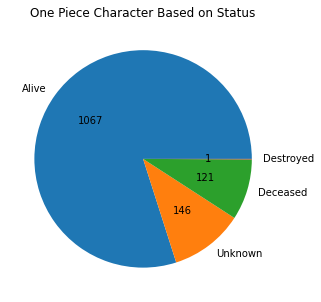

In [1060]:
## Pie chart: Showing count of one piece character based on status
plt.figure(figsize=(5, 5))
devilfruit_status = df_onepiece['Status'].value_counts()
plt.pie(devilfruit_status, labels=devilfruit_status.index, autopct=lambda p: '{:.0f}'.format(p * devilfruit_status.sum() / 100))
plt.title('One Piece Character Based on Status')
plt.show()

### Devil Fruit

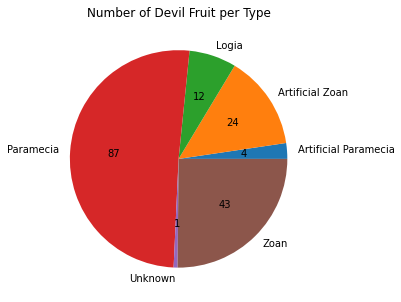

In [1061]:
# Pie chart: Showing count of devil fruit user based on type
fruit_counts = df_onepiece.groupby('Devil Fruit Type')['Devil Fruit Name'].nunique()
plt.figure(figsize=(5, 5))
plt.pie(fruit_counts, labels=fruit_counts.index, autopct=lambda p: '{:.0f}'.format(p * fruit_counts.sum() / 100))
plt.title('Number of Devil Fruit per Type')
plt.show()

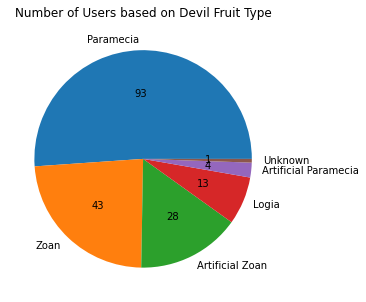

In [1062]:
# Pie chart: Showing count of devil fruit user based on type
plt.figure(figsize=(5, 5))
devil_fruit_user = df_onepiece['Devil Fruit Type'].value_counts()
plt.pie(devil_fruit_user, labels=devil_fruit_user.index, autopct=lambda p: '{:.0f}'.format(p * devil_fruit_user.sum() / 100))
plt.title('Number of Users based on Devil Fruit Type')
plt.show()

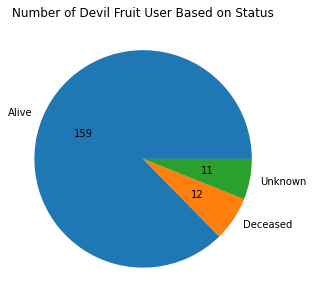

In [1063]:
## Pie chart: Showing count of devil fruit based on type
plt.figure(figsize=(5, 5))
devilfruit_status = df_onepiece[df_onepiece['Devil Fruit Type'].notnull()]['Status'].value_counts()
plt.pie(devilfruit_status, labels=devilfruit_status.index, autopct=lambda p: '{:.0f}'.format(p * devilfruit_status.sum() / 100))
plt.title('Number of Devil Fruit User Based on Status')
plt.show()

In [1064]:
df_onepiece[(df_onepiece['Status'] == 'Unknown') & (df_onepiece['Devil Fruit Name'].notnull())]

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type
67,Basil Hawkins,Hawkins Pirates;[1] Beasts Pirates[2],Pirate; Captain;[1] Shinuchi,Unknown,Wara Wara no Mi,North Blue[1],NaN,Paramecia,320000000,NaN,31.0,September 9,S
211,Charlotte Linlin,Big Mom Pirates;[1] Rocks Pirates (former);[2]...,Pirate Captain;[1] Emperor (former);[3][4] Que...,Unknown,Soru Soru no Mi,Grand Line[17],Whole Cake Island;[1]Elbaf (former)[7],Paramecia,4388000000,NaN,68.0,February 15,X
236,Charlotte Opera,Charlotte Family;[2] Big Mom Pirates[3],Pirate Officer;[4] Minister of Whipped Cream[2],Unknown,Kuri Kuri no Mi,NaN,Noko Island[5],Paramecia,<NA>,NaN,46.0,September 29,NaN
380,Eustass Kid,Kid Pirates[1] Ninja-Pirate-Mink-Samurai Alliance,Pirate Captain[1],Unknown,Jiki Jiki no Mi,South Blue[1],NaN,Paramecia,3000000000,NaN,23.0,January 10,F
446,Ginrummy,Beasts Pirates[1],Shinuchi[2],Unknown,SMILE,NaN,NaN,Artificial Zoan,<NA>,NaN,NaN,January 23,NaN
629,Kaidou,Beasts Pirates;[3] Rocks Pirates (former);[4] ...,Governor-General;[6] Emperor (former);[5] Sold...,Unknown,"Uo Uo no Mi, Model: Seiryu",Grand Line[8],Wano Country (Onigashima);[9]Vodka Kingdom (fo...,Zoan,4611100000,NaN,59.0,May 1,F
980,Pekoms,Big Mom Pirates;[1] Nox Pirates (former)[2],Combatant;[1] Broker[3],Unknown,Kame Kame no Mi,NaN,Zou (former)[6],Zoan,330000000,NaN,27.0,April 11,S
1137,Sheepshead,Beasts Pirates[1],"Shinuchi of the Gifters (ギフターズ真打ち, Gifutāzu Sh...",Unknown,Sheep SMILE,Grand Line[3],NaN,Artificial Zoan,<NA>,NaN,24.0,June 6,F
1140,Shiki,Golden Lion Pirates; Rocks Pirates (former);[3...,Pirate Captain/Admiral; Prisoner of the Great ...,Unknown,Fuwa Fuwa no Mi,NaN,Merveille,Paramecia,<NA>,NaN,NaN,March 20,NaN
1294,Uta,Red Hair Pirates (former),Singer;[2] Musician (former);[4] Pirate (forme...,Unknown,Uta Uta no Mi,NaN,Elegia (former),Paramecia,<NA>,NaN,21.0,October 1,XF


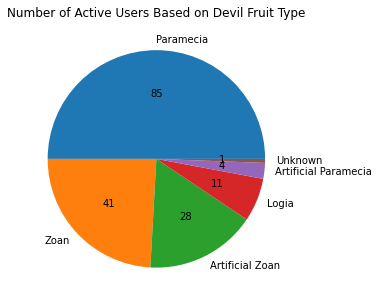

In [1065]:
# Pie Chart: Displaying the of active users based on their devil fruit type
plt.figure(figsize=(5, 5))
devilfruit_alive_count = df_onepiece[df_onepiece['Status'].isin(['Alive', 'Unknown'])]['Devil Fruit Type'].value_counts()
plt.pie(devilfruit_alive_count, labels=devilfruit_alive_count.index, autopct=lambda p: '{:.0f}'.format(p * devilfruit_alive_count.sum() / 100))
plt.title('Number of Active Users Based on Devil Fruit Type')
plt.show()

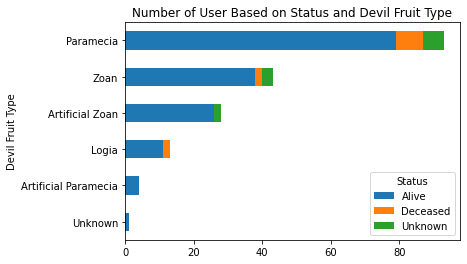

In [1066]:
# Bar Chart: Displaying the of devil fruit users based on type and status 
devilFruit_status = df_onepiece.groupby(['Devil Fruit Type', 'Status']).size().reset_index().pivot(columns='Status', index='Devil Fruit Type', values=0)
devilFruit_status = devilFruit_status.fillna(0)
devilFruit_status['Total'] = devilFruit_status['Alive'] + devilFruit_status['Deceased'] + devilFruit_status['Unknown'] 
devilFruit_status.sort_values('Total', ascending=True, inplace=True)
devilFruit_status[['Alive', 'Deceased','Unknown' ]].plot(kind='barh', stacked=True)
plt.title('Number of User Based on Status and Devil Fruit Type')
plt.show()

### Origin

One Piece regions are typically categorized into: East Blue, West Blue, South Blue, North Blue, Grand Line, Sky Islands, Sea Floor, Red Line and Calm Belt.

In [1067]:
# Extract Origin
specific_substrings = [
    ' (Skypiea)', ' (Ryugu Kingdom)', ' (Wano Country)', ' (Syrup Village)',
    ' (Sorbet Kingdom)', ' (Conomi Islands)', ' (Goa Kingdom)', ' (Mogaro Kingdom)',
    ' (Organ Islands)', ' (Elbaf)', ' (Arabasta Kingdom)', ' (Mary Geoise)', ' (Germa Kingdom)',
    ' (At a random port)', ' (Totto Land)', ' (Amazon Lily)', ' (Ryugu Kingdom, Fish-Man Island)',
    ' (Mokomo Dukedom)',' (On a boat)', ' (Bourgeois Kingdom)', ' (Drum Kingdom)', ' (Water 7)',
     ' (Kano Country)', ' (Ohara)', ' (Prodence Kingdom)', ' (Kamabakka Kingdom)', ' (Birka)', ' (Loguetown)',
    ' (Fish-Man Island)', ' (Gecko Islands)', ' (Water 7, Slums)', ' (Moby Dick)', ' (Green Bit)', ' (Foosha Village)',
    ' (Karate Island)', ' (New World)', ' (Drum Island)', ' (Standing Kingdom)', ' (Baterilla)', ' (Shimotsuki Village)',
    ' (Dressrosa)', ' (Rural Village)', ' (Dawn Island)', ' (North Pole)', ' (Long Ring Long Land)', ' (Karakuri Island)']

location_mappings = {
    'Ryugu Kingdom': 'Sea Floor',
    'Fish-Man Island': 'Sea Floor',
    'Skypiea': 'Sky Islands',
    'Zou': 'Grand Line',
    'Wano Country': 'Grand Line',
    'Jaya': 'Grand Line',
    'Punk Hazard': 'Grand Line',
    'Lvneel Kingdom': 'North Blue',
    'Skypiea': 'Sky Islands',
    'Sky Island': 'Sky Islands',
    'Tibet': 'Unknown'}

def extract_origin(origin):
    if isinstance(origin, str):
        extracted_location = re.sub(r'\[.*?\]', '', origin).strip()
        for word, condition in location_mappings.items():
            if word in extracted_location:
                return condition
        for substring in specific_substrings:
            extracted_location = extracted_location.replace(substring, '').strip()
        return location_mappings.get(extracted_location, extracted_location)
    return 'Unknown'

df_onepiece['Origin Sea'] = df_onepiece['Origin'].apply(extract_origin)

/tmp/ipykernel_85/3803108038.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onepiece['Origin Sea'] = df_onepiece['Origin'].apply(extract_origin)


In [1068]:
df_onepiece.head(2)

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type,Origin Sea
0,A O,A O Pirates;[2] Subordinate of the Whitebeard ...,Pirate; Captain[1][2],Unknown,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,January 15,NaN,Unknown
1,Abdullah,Ideo Pirates[2][3]; Straw Hat Grand Fleet[4],"Pirate[3], Criminal; Bounty Hunter (former)[1]",Alive,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,Unknown


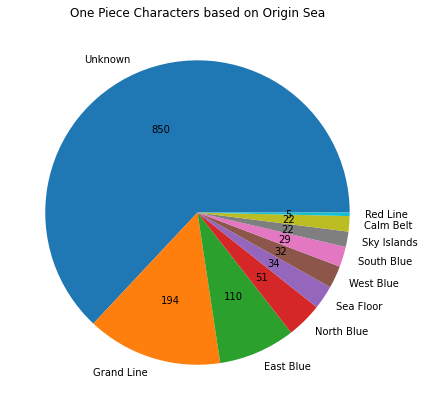

In [1069]:
# Pie chart: Number of characters based on origin sea
plt.figure(figsize=(7, 7))
character_origin = df_onepiece['Origin Sea'].value_counts()
plt.pie(character_origin, labels=character_origin.index, autopct=lambda p: '{:.0f}'.format(p * character_origin.sum() / 100))
plt.title('One Piece Characters based on Origin Sea')
plt.show()

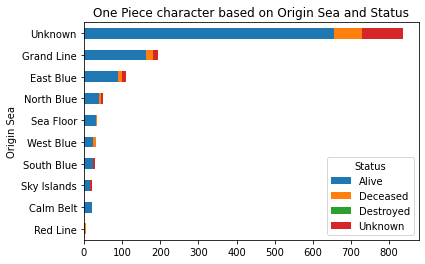

In [1070]:
# Bar Chart : Number of character based on origin and status
character_origin_status = df_onepiece.groupby(['Origin Sea', 'Status']).size().reset_index().pivot(columns='Status', index='Origin Sea', values=0)
character_origin_status = character_origin_status.fillna(0)
character_origin_status['Total'] = character_origin_status['Alive'] + character_origin_status['Deceased'] + character_origin_status['Destroyed'] + character_origin_status['Unknown']
character_origin_status.sort_values('Total', ascending=True, inplace=True)
character_origin_status[['Alive', 'Deceased','Destroyed', 'Unknown']].plot(kind='barh', stacked=True)
plt.title('One Piece character based on Origin Sea and Status')
plt.show()

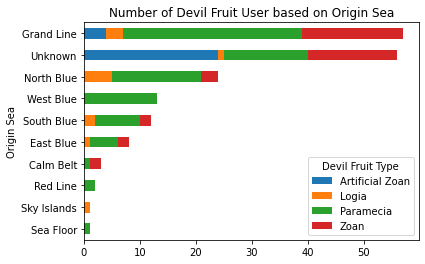

In [1071]:
# Bar Chart : Number of devil fruit user based on origin
devilFruit_user_origin= df_onepiece.groupby(['Origin Sea', 'Devil Fruit Type']).size().reset_index().pivot(columns='Devil Fruit Type', index='Origin Sea', values=0)
devilFruit_user_origin = devilFruit_user_origin.fillna(0)
devilFruit_user_origin['Total'] = devilFruit_user_origin['Artificial Zoan'] + devilFruit_user_origin['Logia'] + devilFruit_user_origin['Paramecia'] + devilFruit_user_origin['Zoan']
devilFruit_user_origin.sort_values('Total', ascending=True, inplace=True)
devilFruit_user_origin[['Artificial Zoan', 'Logia','Paramecia', 'Zoan']].plot(kind='barh', stacked=True)
plt.title('Number of Devil Fruit User based on Origin Sea')
plt.show()

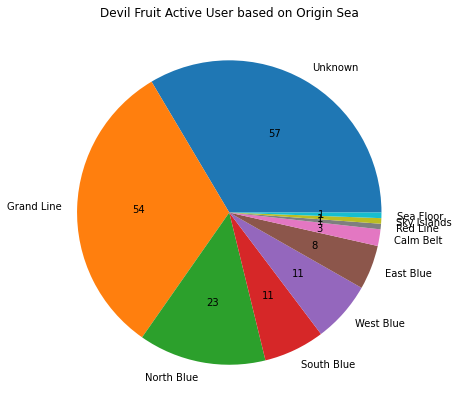

In [1072]:
# Pie chart: Number of devil fruit active user based on origin sea
plt.figure(figsize=(7, 7))
devil_fruits = df_onepiece[(df_onepiece['Devil Fruit Name'].notnull()) & (df_onepiece['Status'].isin(['Alive', 'Unknown']))]
df_user_origin = devil_fruits['Origin Sea'].value_counts()
plt.pie(df_user_origin, labels=df_user_origin.index, autopct=lambda p: '{:.0f}'.format(p * df_user_origin.sum() / 100))
plt.title('Devil Fruit Active User based on Origin Sea')
plt.show()

### Blood Type

In [1073]:
df_onepiece['Blood Type'].unique()

array([nan, 'F', 'XF', 'S', 'X', 'Green Blood'], dtype=object)

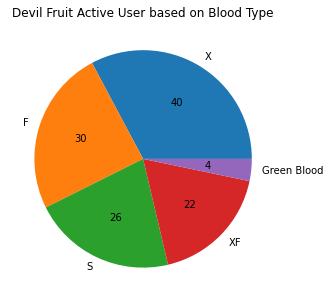

In [1074]:
## Pie chart: Showing count of devil fruit active user  based on blood type
plt.figure(figsize=(5, 5))
df_active = df_onepiece[(df_onepiece['Devil Fruit Name'].notnull()) & (df_onepiece['Status'].isin(['Alive', 'Unknown']))]
df_bloodtype = df_active['Blood Type'].value_counts()
plt.pie(df_bloodtype, labels=df_bloodtype.index, autopct=lambda p: '{:.0f}'.format(p * df_bloodtype.sum() / 100))
plt.title('Devil Fruit Active User based on Blood Type')
plt.show()

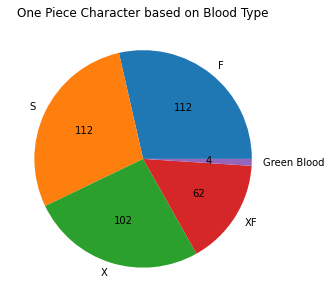

In [1075]:
## Pie chart: Showing count of one piece character  based on blood type
plt.figure(figsize=(5, 5))
bloodtype = df_onepiece['Blood Type'].value_counts()
plt.pie(bloodtype, labels=bloodtype.index, autopct=lambda p: '{:.0f}'.format(p * bloodtype.sum() / 100))
plt.title('One Piece Character based on Blood Type')
plt.show()

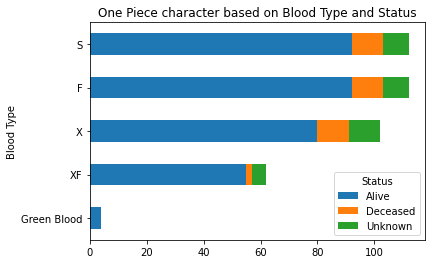

In [1076]:
# Bar Chart : Number of character based on blood type and status
bloodtype_status = df_onepiece.groupby(['Blood Type', 'Status']).size().reset_index().pivot(columns='Status', index='Blood Type', values=0)
bloodtype_status = bloodtype_status.fillna(0)
bloodtype_status['Total'] = bloodtype_status['Alive'] + bloodtype_status['Deceased'] + bloodtype_status['Unknown']
bloodtype_status.sort_values('Total', ascending=True, inplace=True)
bloodtype_status[['Alive', 'Deceased', 'Unknown']].plot(kind='barh', stacked=True)
plt.title('One Piece character based on Blood Type and Status')
plt.show()

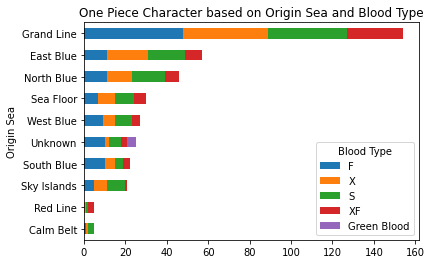

In [1077]:
# Bar Chart : Number of one piece character based on origin sea and blood type
bloodtype_origin= df_onepiece.groupby(['Origin Sea', 'Blood Type']).size().reset_index().pivot(columns='Blood Type', index='Origin Sea', values=0)
bloodtype_origin = bloodtype_origin.fillna(0)
bloodtype_origin['Total'] = bloodtype_origin['F'] + bloodtype_origin['X'] + bloodtype_origin['S'] + bloodtype_origin['XF'] + bloodtype_origin['Green Blood']
bloodtype_origin.sort_values('Total', ascending=True, inplace=True)
bloodtype_origin[['F', 'X','S', 'XF', 'Green Blood']].plot(kind='barh', stacked=True)
plt.title('One Piece Character based on Origin Sea and Blood Type')
plt.show()

### Age & Age of Death

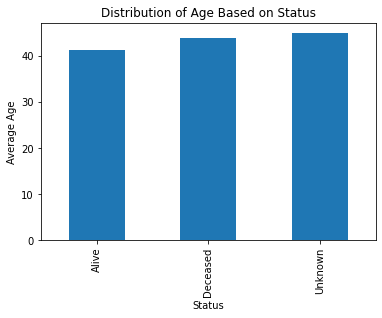

In [1078]:
# Histogram : Distribution of age
df_age = df_onepiece[df_onepiece['Status'].isin(['Alive', 'Unknown', 'Deceased'])]
age_status = df_age.groupby('Status')['Age'].mean()

# Create a bar chart
age_status.plot(kind='bar')
plt.title('Distribution of Age Based on Status')
plt.xlabel('Status')
plt.ylabel('Average Age')
plt.show()

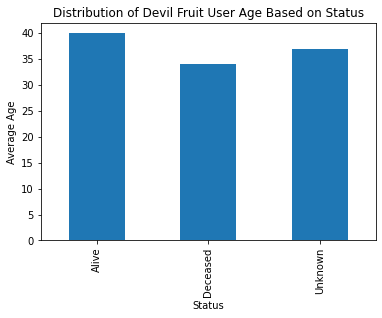

In [1079]:
# Histogram : Distribution of devil fruit user's age 
df_age_fruit = df_onepiece[(df_onepiece['Status'].isin(['Alive', 'Unknown', 'Deceased'])) &
                     (df_onepiece['Devil Fruit Name'].notnull())]
fruit_age_status = df_age_fruit.groupby('Status')['Age'].mean()

# Create a bar chart
fruit_age_status.plot(kind='bar')
plt.title('Distribution of Devil Fruit User Age Based on Status')
plt.xlabel('Status')
plt.ylabel('Average Age')
plt.show()

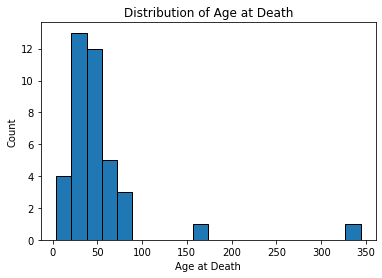

In [1080]:
# Histogram : Distribution of age at death 
plt.hist(df_onepiece['Age at Death'], bins=20, edgecolor='black')
plt.title('Distribution of Age at Death')
plt.xlabel('Age at Death')
plt.ylabel('Count')
plt.show()

### Bounty

In [1081]:
df_onepiece['Bounty'].max()

5564800000

In [1082]:
# Top 10 bounties
top_10_bounties = df_onepiece.sort_values(by='Bounty', ascending=False).head(10)
top_10_bounties['Name_and_Bounty'] = top_10_bounties['Name'] + ': ' + top_10_bounties['Bounty'].astype(str)
print(top_10_bounties['Name_and_Bounty'])

458          Gol D. Roger: 5564800000
362        Edward Newgate: 5046000000
629                Kaidou: 4611100000
211      Charlotte Linlin: 4388000000
1135               Shanks: 4048900000
788     Marshall D. Teach: 3996000000
351        Dracule Mihawk: 3590000000
129                 Buggy: 3189000000
576                 Issho: 3000000000
856        Monkey D. Garp: 3000000000
Name: Name_and_Bounty, dtype: object


In [1083]:
# Bottom 10 bounties
bottom_10_bounties = df_onepiece.sort_values(by='Bounty', ascending=True).head(10)
bottom_10_bounties['Name_and_Bounty'] = bottom_10_bounties['Name'] + ': ' + bottom_10_bounties['Bounty'].astype(str)
print(bottom_10_bounties['Name_and_Bounty'])

81                    Bepo: 500
1254    Tony Tony Chopper: 1000
816         Mikio Itoo: 1000000
298               D.R.: 1800000
48                Babe: 3200000
963           Pandaman: 3333333
1001          Porchemy: 3400000
20              Alvida: 5000000
418              Gally: 5000000
256               Chew: 5500000
Name: Name_and_Bounty, dtype: object


In [1085]:
df_onepiece[df_onepiece['Name'] == 'Rocks D. Xebec']

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type,Origin Sea
1059,Rocks D. Xebec,Rocks Pirates[1],Pirate Captain[1],Deceased,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,Unknown


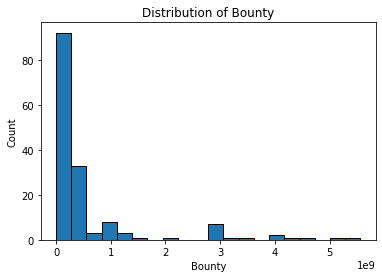

In [1086]:
# Histogram : Distribution of bounty
df_bounty = df_onepiece[df_onepiece['Bounty'].notnull()]
plt.hist(df_bounty['Bounty'], bins=20, edgecolor='black')
plt.title('Distribution of Bounty')
plt.xlabel('Bounty')
plt.ylabel('Count')
plt.show()

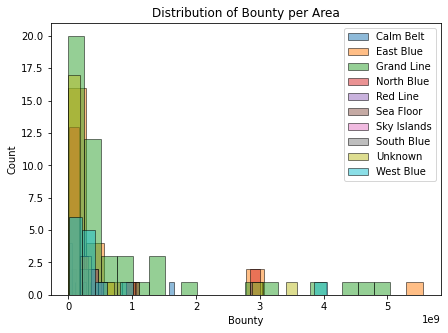

In [1088]:
plt.figure(figsize=(7, 5))
for area, data in df_bounty.groupby('Origin Sea'):
    plt.hist(data['Bounty'], bins=20, alpha=0.5, edgecolor='black', label=area)

plt.title('Distribution of Bounty per Area')
plt.xlabel('Bounty')
plt.ylabel('Count')
plt.legend()
plt.show()

In [1103]:
# Top 3 bounties per Origin Sea
top_3_per_origin = pd.DataFrame(columns=['Name', 'Bounty', 'Origin Sea'])

for area, data in df_bounty[['Name', 'Bounty', 'Origin Sea']].groupby('Origin Sea'):
    top_3 = data.sort_values(by='Bounty', ascending=False).head(3)
    top_3_per_origin = pd.concat([top_3_per_origin, top_3])

print(top_3_per_origin)

                        Name      Bounty   Origin Sea
99               Boa Hancock  1659000000    Calm Belt
100             Boa Marigold    40000000    Calm Belt
101          Boa Sandersonia    40000000    Calm Belt
458             Gol D. Roger  5564800000    East Blue
857          Monkey D. Luffy  3000000000    East Blue
856           Monkey D. Garp  3000000000    East Blue
362           Edward Newgate  5046000000   Grand Line
629                   Kaidou  4611100000   Grand Line
211         Charlotte Linlin  4388000000   Grand Line
1260  Trafalgar D. Water Law  3000000000   North Blue
113                Borsalino  3000000000   North Blue
1098                   Sanji  1032000000   North Blue
342    Donquixote Doflamingo   340000000     Red Line
606                    Jinbe  1100000000    Sea Floor
389             Fisher Tiger   230000000    Sea Floor
32                    Arlong    20000000    Sea Floor
1288                  Urouge   108000000  Sky Islands
380              Eustass Kid

/tmp/ipykernel_85/1304262605.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_3_per_origin = pd.concat([top_3_per_origin, top_3])


### Birthday

### Occupations

In [773]:
df_onepiece[df_onepiece['Age at Death']== 344]

,Name,Affiliations,Occupations,Status,Devil Fruit Name,Origin,Residence,Devil Fruit Type,Bounty,Age at Death,Age,Birthday,Blood Type,Origin Sea
617,Jorul,Giant Warrior Pirates; Elbaf[1],Pirate Captain (former)[1],Deceased,NaN,Grand Line (Elbaf)[3],Elbaf[1],NaN,NaN,344.0,NaN,December 4,F,Grand Line


In [ ]:
# csv_file = "one_piece_characters_new.csv"
# df.to_csv(csv_file, index=False)